In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

In [2]:
!pip install keras


In [3]:
!pip install tensorflow
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional
from keras.utils import to_categorical

In [4]:
pip install setuptools

In [5]:
# Preprocessing functions
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dathasai\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dathasai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    cleaned = [word for word in tokens if word.isalpha() and word not in stop_words]
    return ' '.join(cleaned)
df = pd.read_csv('df_m.csv')
df['cleaned_text'] = df['text'].apply(preprocess_text)

vectorizer = TfidfVectorizer(max_features=5000)  # Limiting features for simplicity
X = vectorizer.fit_transform(df['cleaned_text']).toarray()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Function to plot accuracy curve
def plot_accuracy(history, title):
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Test Accuracy')
    plt.title(f'{title} Accuracy Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

Epoch 1/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.9338 - loss: 0.9041 - val_accuracy: 0.9900 - val_loss: 0.0452
Epoch 2/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9916 - loss: 0.0365 - val_accuracy: 0.9900 - val_loss: 0.0319
Epoch 3/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9899 - loss: 0.0298 - val_accuracy: 0.9950 - val_loss: 0.0269
Epoch 4/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9960 - loss: 0.0156 - val_accuracy: 0.9938 - val_loss: 0.0236
Epoch 5/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9976 - loss: 0.0095 - val_accuracy: 0.9938 - val_loss: 0.0228
Epoch 6/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9977 - loss: 0.0063 - val_accuracy: 0.9925 - val_loss: 0.0224
Epoch 7/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9976 - loss: 0.0056 - val_accuracy: 0.9925 - val_loss: 0.0240
Epoch 8/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9981 - loss: 0.0043 - val_accu

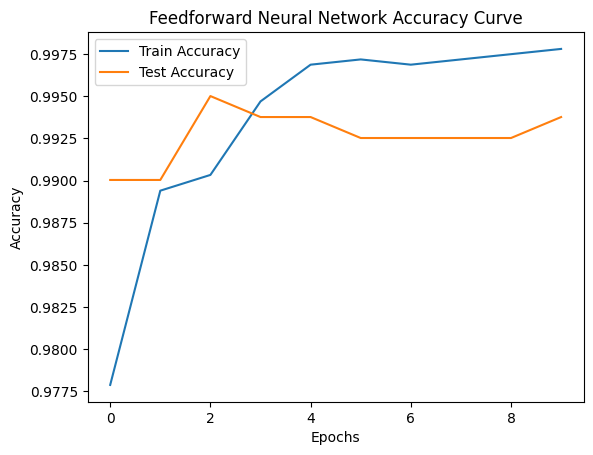

In [17]:
from keras.utils import to_categorical

# Feedforward Neural Network
model_ffnn = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')  # Output layer size should match number of classes
])

model_ffnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Use one-hot encoded labels for training
history_ffnn = model_ffnn.fit(X_train, y_train_one_hot, validation_data=(X_test, y_test_one_hot), epochs=10, batch_size=32)

# Plot accuracy (make sure you have defined the plot_accuracy function)
plot_accuracy(history_ffnn, 'Feedforward Neural Network')


C:\Users\Dathasai\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
101/101 ━━━━━━━━━━━━━━━━━━━━ 342s 3s/step - accuracy: 0.9378 - loss: 0.9731 - val_accuracy: 0.9900 - val_loss: 0.0629
Epoch 2/5
101/101 ━━━━━━━━━━━━━━━━━━━━ 337s 3s/step - accuracy: 0.9890 - loss: 0.0644 - val_accuracy: 0.9900 - val_loss: 0.0633
Epoch 3/5
101/101 ━━━━━━━━━━━━━━━━━━━━ 345s 3s/step - accuracy: 0.9904 - loss: 0.0609 - val_accuracy: 0.9900 - val_loss: 0.0645
Epoch 4/5
101/101 ━━━━━━━━━━━━━━━━━━━━ 327s 3s/step - accuracy: 0.9892 - loss: 0.0630 - val_accuracy: 0.9900 - val_loss: 0.0658
Epoch 5/5
101/101 ━━━━━━━━━━━━━━━━━━━━ 339s 3s/step - accuracy: 0.9885 - loss: 0.0670 - val_accuracy: 0.9900 - val_loss: 0.0640


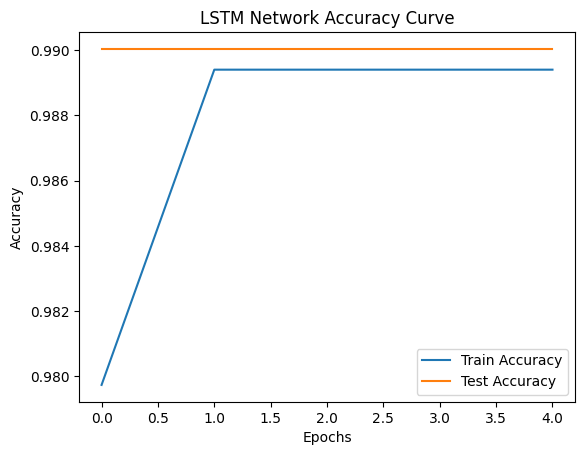

In [20]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
import numpy as np

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Convert string labels to integer labels
y_train_encoded = label_encoder.fit_transform(y_train)  # Encodes string labels as integers
y_test_encoded = label_encoder.transform(y_test)

# One-hot encode the labels after encoding
num_classes = len(np.unique(y_train_encoded))  # Number of unique classes in y_train_encoded
y_train_one_hot = to_categorical(y_train_encoded, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test_encoded, num_classes=num_classes)

# LSTM Model definition
model_lstm = Sequential([
    LSTM(32, input_shape=(X_train.shape[1], 1)),  # Reduce the number of LSTM units
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Ensure the input data has the correct shape for LSTM
X_train_lstm = np.expand_dims(X_train, axis=-1)  # Ensure shape is (samples, features, 1)
X_test_lstm = np.expand_dims(X_test, axis=-1)    # Ensure shape is (samples, features, 1)

# Train the model
history_lstm = model_lstm.fit(X_train_lstm, y_train_one_hot, validation_data=(X_test_lstm, y_test_one_hot), epochs=5, batch_size=32)

# Plot accuracy (assuming you have a plot_accuracy function)
plot_accuracy(history_lstm, 'LSTM Network')


C:\Users\Dathasai\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
101/101 ━━━━━━━━━━━━━━━━━━━━ 816s 8s/step - accuracy: 0.9411 - loss: 0.6167 - val_accuracy: 0.9900 - val_loss: 0.0652
Epoch 2/5
101/101 ━━━━━━━━━━━━━━━━━━━━ 934s 9s/step - accuracy: 0.9900 - loss: 0.0605 - val_accuracy: 0.9900 - val_loss: 0.0666
Epoch 3/5
101/101 ━━━━━━━━━━━━━━━━━━━━ 922s 9s/step - accuracy: 0.9933 - loss: 0.0455 - val_accuracy: 0.9900 - val_loss: 0.0688
Epoch 4/5
101/101 ━━━━━━━━━━━━━━━━━━━━ 1174s 12s/step - accuracy: 0.9889 - loss: 0.0666 - val_accuracy: 0.9900 - val_loss: 0.0656
Epoch 5/5
101/101 ━━━━━━━━━━━━━━━━━━━━ 931s 9s/step - accuracy: 0.9893 - loss: 0.0644 - val_accuracy: 0.9900 - val_loss: 0.0673


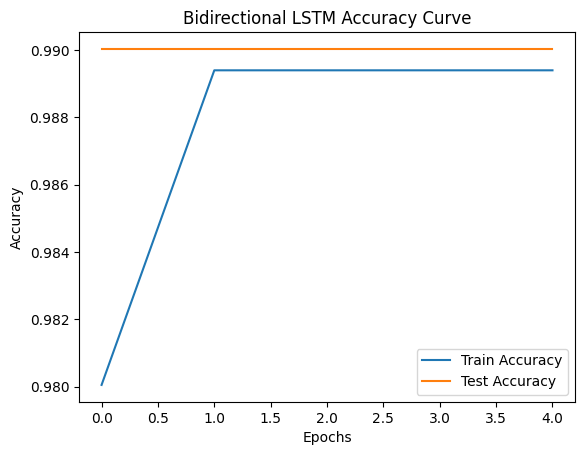

In [24]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
import numpy as np
from keras.layers import Bidirectional, LSTM, Dense
from keras.models import Sequential

# Step 1: Encode string labels to integers using LabelEncoder
label_encoder = LabelEncoder()

# Convert string labels to integer labels
y_train_encoded = label_encoder.fit_transform(y_train)  # Encodes string labels as integers
y_test_encoded = label_encoder.transform(y_test)

# Step 2: One-hot encode the integer labels
num_classes = len(np.unique(y_train_encoded))  # Number of unique classes
y_train_one_hot = to_categorical(y_train_encoded, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test_encoded, num_classes=num_classes)

# Step 3: Define the Bidirectional LSTM model
model_bilstm = Sequential([
    Bidirectional(LSTM(64, input_shape=(X_train.shape[1], 1))),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')  # Output layer with num_classes units
])

# Step 4: Compile the model
model_bilstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 5: Ensure input data shape is correct for LSTM
X_train_lstm = np.expand_dims(X_train, axis=-1)  # Shape should be (samples, features, 1)
X_test_lstm = np.expand_dims(X_test, axis=-1)

# Step 6: Train the model using the one-hot encoded labels
history_bilstm = model_bilstm.fit(X_train_lstm, y_train_one_hot, validation_data=(X_test_lstm, y_test_one_hot), epochs=5, batch_size=32)

# Step 7: Plot accuracy (assuming you have a plot_accuracy function)
plot_accuracy(history_bilstm, 'Bidirectional LSTM')


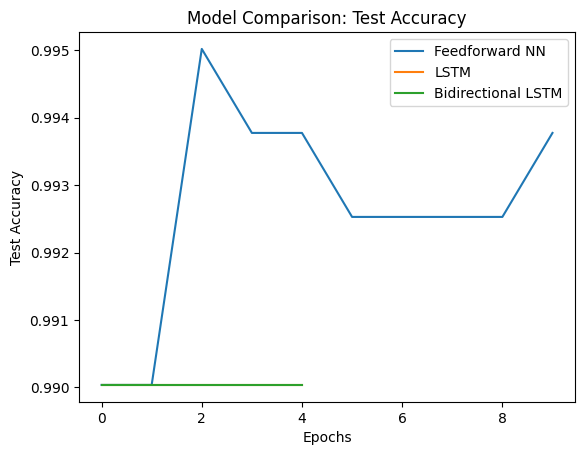

In [25]:
# 4. Model Performance Comparison
def compare_models(histories):
    for label, history in histories.items():
        plt.plot(history.history['val_accuracy'], label=label)
    plt.title('Model Comparison: Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Test Accuracy')
    plt.legend()
    plt.show()

compare_models({
    'Feedforward NN': history_ffnn,
    'LSTM': history_lstm,
    'Bidirectional LSTM': history_bilstm
})

In [26]:
import matplotlib.pyplot as plt

def plot_accuracy(histories, model_names):
    plt.figure(figsize=(10, 6))

    # Loop through histories and plot their accuracy
    for i, history in enumerate(histories):
        plt.plot(history.history['accuracy'], label=f'Train Accuracy - {model_names[i]}', linestyle='--')
        plt.plot(history.history['val_accuracy'], label=f'Validation Accuracy - {model_names[i]}')

    plt.title('Model Accuracy Comparison')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

# Assuming you have three trained models: history_lstm, history_bilstm, and another model history
plot_accuracy([history_lstm, history_bilstm, history_ff], ['LSTM', 'BiLSTM', 'Other Model'])


NameError: name 'history_other' is not defined